In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier

In [47]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

In [48]:
!pip install xgboost

In [49]:
from xgboost import XGBClassifier

In [50]:
df=pd.read_csv("vocal_gender_features_new.csv")

In [51]:
df

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
0,2247.331739,1158.537748,1870.415462,370.405241,21.440710,0.036879,4419.438073,0.169241,0.082552,1592.1033,...,21.736240,2.303085,8.983318,-17.410305,9.115154,0.301804,10.452693,-3.080832,10.146248,0
1,1790.719889,996.554825,1757.898617,410.710318,21.513383,0.018936,3635.742188,0.108068,0.055477,1112.6351,...,13.937135,-0.953942,10.831742,-0.088775,10.297690,-7.281142,10.926579,-0.450248,8.489134,0
2,1977.923363,1010.148667,1747.099555,461.458379,20.476283,0.032616,3873.291016,0.144633,0.060388,1557.5225,...,14.900779,0.260098,14.031009,-0.420670,10.810292,-0.199829,11.986182,3.372986,9.285437,0
3,2037.765550,1311.440630,1745.224852,419.056484,19.516014,0.028482,3826.584507,0.148933,0.029559,1481.0868,...,15.957924,-1.486122,14.461978,-8.479608,12.550333,3.997028,9.912608,-6.946966,10.574301,0
4,1739.383829,1092.623322,1623.135563,450.088465,20.260620,0.025737,3452.903892,0.117961,0.069078,1424.5352,...,15.105562,-3.366364,13.943447,-6.561539,11.944948,1.410639,13.110976,-3.252258,9.866687,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16143,1879.614568,1092.394432,1802.821290,479.751352,19.930251,0.017547,3882.812500,0.116425,0.088527,1458.0010,...,12.486454,-4.034742,13.771613,-5.278946,14.380637,5.627317,9.196584,-7.411221,12.621205,1
16144,1810.603695,1124.628905,1829.785209,491.274993,19.115077,0.017356,3816.685268,0.110338,0.067830,1538.0670,...,12.727633,-2.590058,15.919325,-6.724170,14.858981,6.610045,8.266881,-6.264262,13.771297,1
16145,1820.216958,1197.520780,1770.716715,509.906085,19.506173,0.015819,3728.759766,0.105142,0.073135,1637.4955,...,12.606261,-0.207149,15.909226,-9.772965,18.003307,4.041325,9.128441,-3.483847,11.820591,1
16146,1636.619660,1055.832051,1747.968472,500.649272,19.118411,0.014007,3524.797712,0.094456,0.071088,1453.4177,...,11.453891,-2.735264,15.467333,-4.670631,12.668987,3.787537,8.726358,-7.397458,13.588392,1


In [52]:
df.columns

Index(['mean_spectral_centroid', 'std_spectral_centroid',
       'mean_spectral_bandwidth', 'std_spectral_bandwidth',
       'mean_spectral_contrast', 'mean_spectral_flatness',
       'mean_spectral_rolloff', 'zero_crossing_rate', 'rms_energy',
       'mean_pitch', 'min_pitch', 'max_pitch', 'std_pitch', 'spectral_skew',
       'spectral_kurtosis', 'energy_entropy', 'log_energy', 'mfcc_1_mean',
       'mfcc_1_std', 'mfcc_2_mean', 'mfcc_2_std', 'mfcc_3_mean', 'mfcc_3_std',
       'mfcc_4_mean', 'mfcc_4_std', 'mfcc_5_mean', 'mfcc_5_std', 'mfcc_6_mean',
       'mfcc_6_std', 'mfcc_7_mean', 'mfcc_7_std', 'mfcc_8_mean', 'mfcc_8_std',
       'mfcc_9_mean', 'mfcc_9_std', 'mfcc_10_mean', 'mfcc_10_std',
       'mfcc_11_mean', 'mfcc_11_std', 'mfcc_12_mean', 'mfcc_12_std',
       'mfcc_13_mean', 'mfcc_13_std', 'label'],
      dtype='object')

In [53]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16148 entries, 0 to 16147
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_spectral_centroid   16148 non-null  float64
 1   std_spectral_centroid    16148 non-null  float64
 2   mean_spectral_bandwidth  16148 non-null  float64
 3   std_spectral_bandwidth   16148 non-null  float64
 4   mean_spectral_contrast   16148 non-null  float64
 5   mean_spectral_flatness   16148 non-null  float64
 6   mean_spectral_rolloff    16148 non-null  float64
 7   zero_crossing_rate       16148 non-null  float64
 8   rms_energy               16148 non-null  float64
 9   mean_pitch               16148 non-null  float64
 10  min_pitch                16148 non-null  float64
 11  max_pitch                16148 non-null  float64
 12  std_pitch                16148 non-null  float64
 13  spectral_skew            16148 non-null  float64
 14  spectral_kurtosis     

In [54]:
print(df.isnull().sum())

mean_spectral_centroid     0
std_spectral_centroid      0
mean_spectral_bandwidth    0
std_spectral_bandwidth     0
mean_spectral_contrast     0
mean_spectral_flatness     0
mean_spectral_rolloff      0
zero_crossing_rate         0
rms_energy                 0
mean_pitch                 0
min_pitch                  0
max_pitch                  0
std_pitch                  0
spectral_skew              0
spectral_kurtosis          0
energy_entropy             0
log_energy                 0
mfcc_1_mean                0
mfcc_1_std                 0
mfcc_2_mean                0
mfcc_2_std                 0
mfcc_3_mean                0
mfcc_3_std                 0
mfcc_4_mean                0
mfcc_4_std                 0
mfcc_5_mean                0
mfcc_5_std                 0
mfcc_6_mean                0
mfcc_6_std                 0
mfcc_7_mean                0
mfcc_7_std                 0
mfcc_8_mean                0
mfcc_8_std                 0
mfcc_9_mean                0
mfcc_9_std    

In [55]:
print(df.head())

   mean_spectral_centroid  std_spectral_centroid  mean_spectral_bandwidth  \
0             2247.331739            1158.537748              1870.415462   
1             1790.719889             996.554825              1757.898617   
2             1977.923363            1010.148667              1747.099555   
3             2037.765550            1311.440630              1745.224852   
4             1739.383829            1092.623322              1623.135563   

   std_spectral_bandwidth  mean_spectral_contrast  mean_spectral_flatness  \
0              370.405241               21.440710                0.036879   
1              410.710318               21.513383                0.018936   
2              461.458379               20.476283                0.032616   
3              419.056484               19.516014                0.028482   
4              450.088465               20.260620                0.025737   

   mean_spectral_rolloff  zero_crossing_rate  rms_energy  mean_pitch  ... 

In [56]:
df.describe()

,mean_spectral_centroid,std_spectral_centroid,mean_spectral_bandwidth,std_spectral_bandwidth,mean_spectral_contrast,mean_spectral_flatness,mean_spectral_rolloff,zero_crossing_rate,rms_energy,mean_pitch,...,mfcc_9_std,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,label
count,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,...,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000,16148.000000
mean,1709.269730,1027.564673,1584.195931,432.492328,20.395652,0.023086,3281.808257,0.118088,0.084759,1461.624198,...,13.537739,-0.533815,12.515116,-8.933890,10.982858,0.880024,9.721608,-6.711788,9.536517,0.642804
std,315.558063,286.303662,126.360465,78.723202,1.628596,0.010027,526.824341,0.037707,0.022814,287.763342,...,2.438230,5.593673,2.354020,5.315098,1.886158,4.314862,1.794407,4.069641,1.574890,0.479188
min,719.559285,194.998983,1106.939002,199.321584,15.154801,0.001816,1310.661765,0.027727,0.022425,359.391170,...,5.826506,-20.188465,5.459179,-26.082537,5.594748,-13.585977,4.378153,-26.402317,4.686154,0.000000
25%,1475.078509,829.195585,1503.301521,379.552391,19.775875,0.015567,2911.427574,0.089729,0.067508,1279.141250,...,11.861280,-4.521667,10.753869,-12.666048,9.641137,-2.050272,8.455685,-9.676477,8.432545,0.000000
50%,1703.038854,1048.531356,1583.959951,423.121818,20.759579,0.021737,3293.459741,0.116623,0.083121,1484.461250,...,13.306489,-0.625990,12.279825,-8.732289,10.796652,0.949182,9.595896,-6.598702,9.433592,1.000000
75%,1921.202685,1233.451527,1665.806788,477.631817,21.516436,0.029175,3637.773811,0.144095,0.100465,1662.883350,...,15.044193,3.136063,14.099204,-5.328175,12.153640,3.896141,10.863349,-3.575793,10.508087,1.000000
max,3059.390150,1912.173446,2046.070801,724.361505,24.907725,0.072172,5451.099537,0.270710,0.187577,2454.724000,...,26.693924,19.610289,22.717190,6.013963,19.685654,16.436730,17.380630,6.187790,17.941544,1.000000


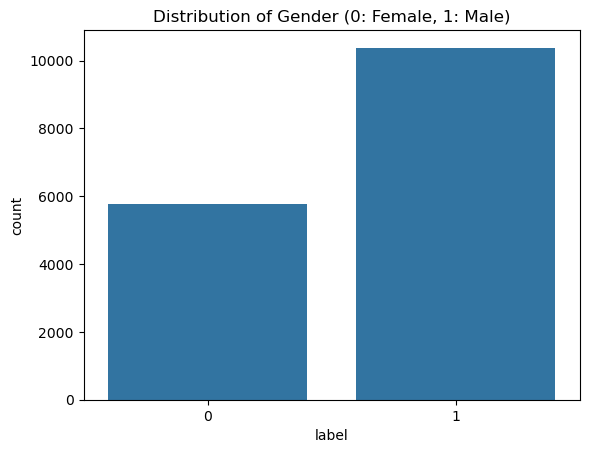

In [57]:
sns.countplot(x='label', data=df)
plt.title('Distribution of Gender (0: Female, 1: Male)')
plt.show()

In [58]:
gender_counts = df['label'].value_counts()
print(gender_counts)

label
1    10380
0     5768
Name: count, dtype: int64


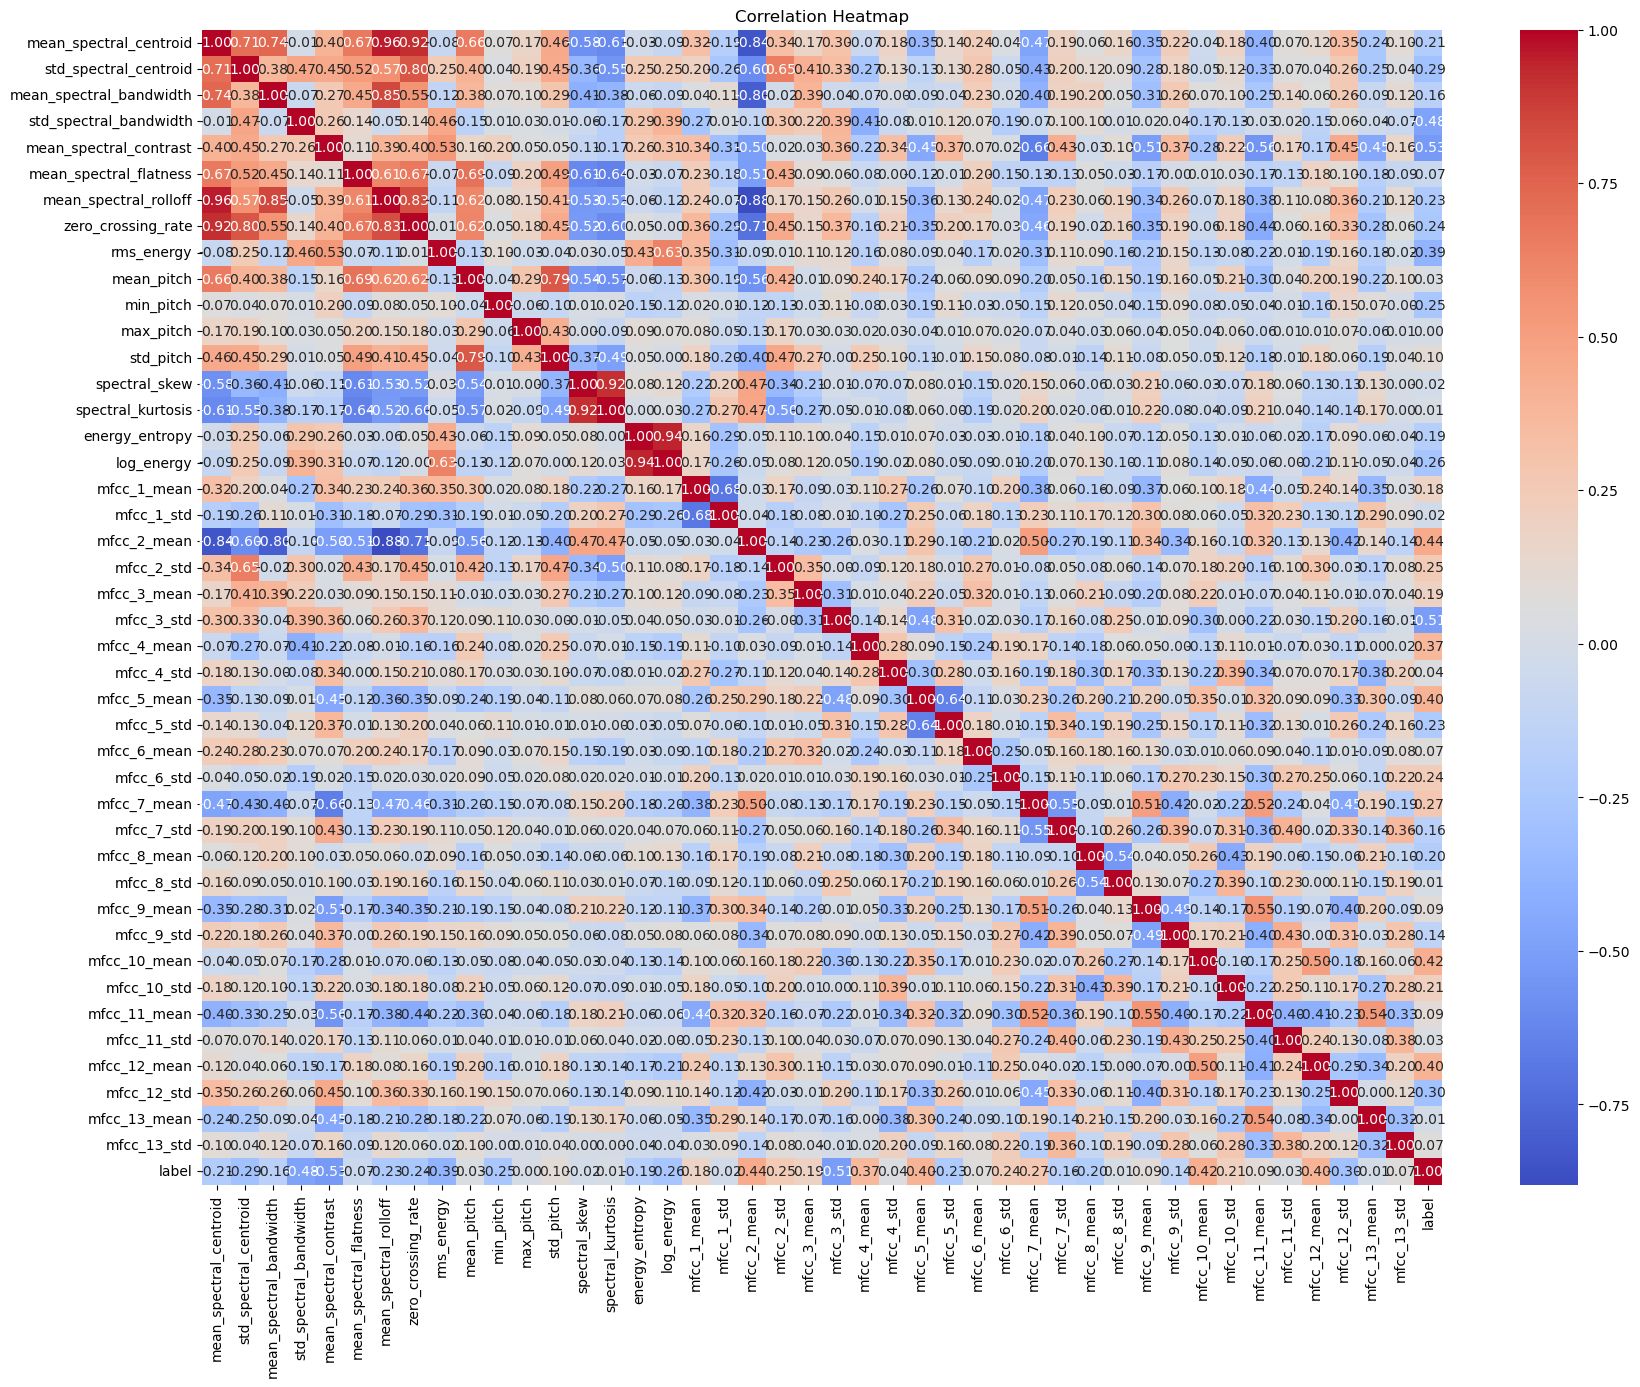

In [59]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

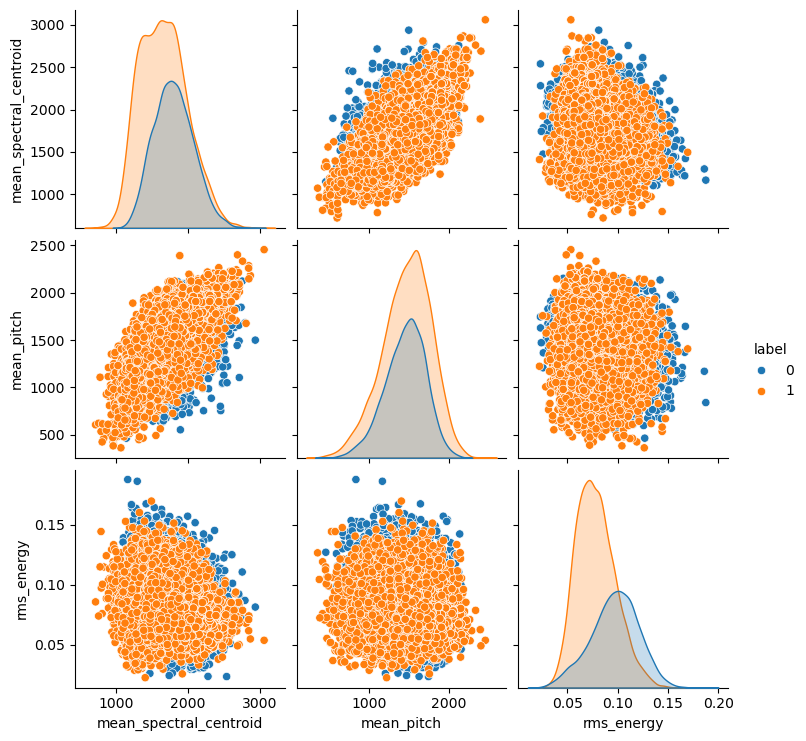

In [60]:
sns.pairplot(df[['mean_spectral_centroid', 'mean_pitch', 'rms_energy', 'label']], hue='label')
plt.show()

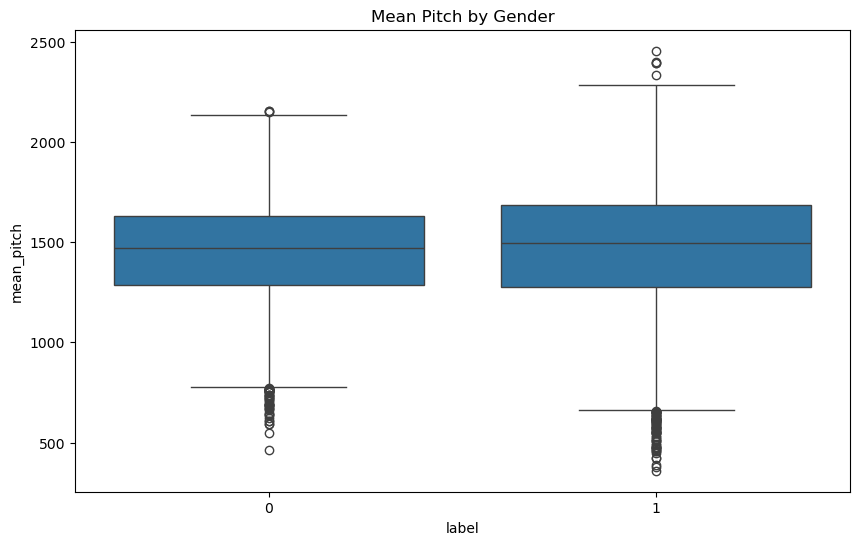

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='mean_pitch', data=df)
plt.title('Mean Pitch by Gender')
plt.show()

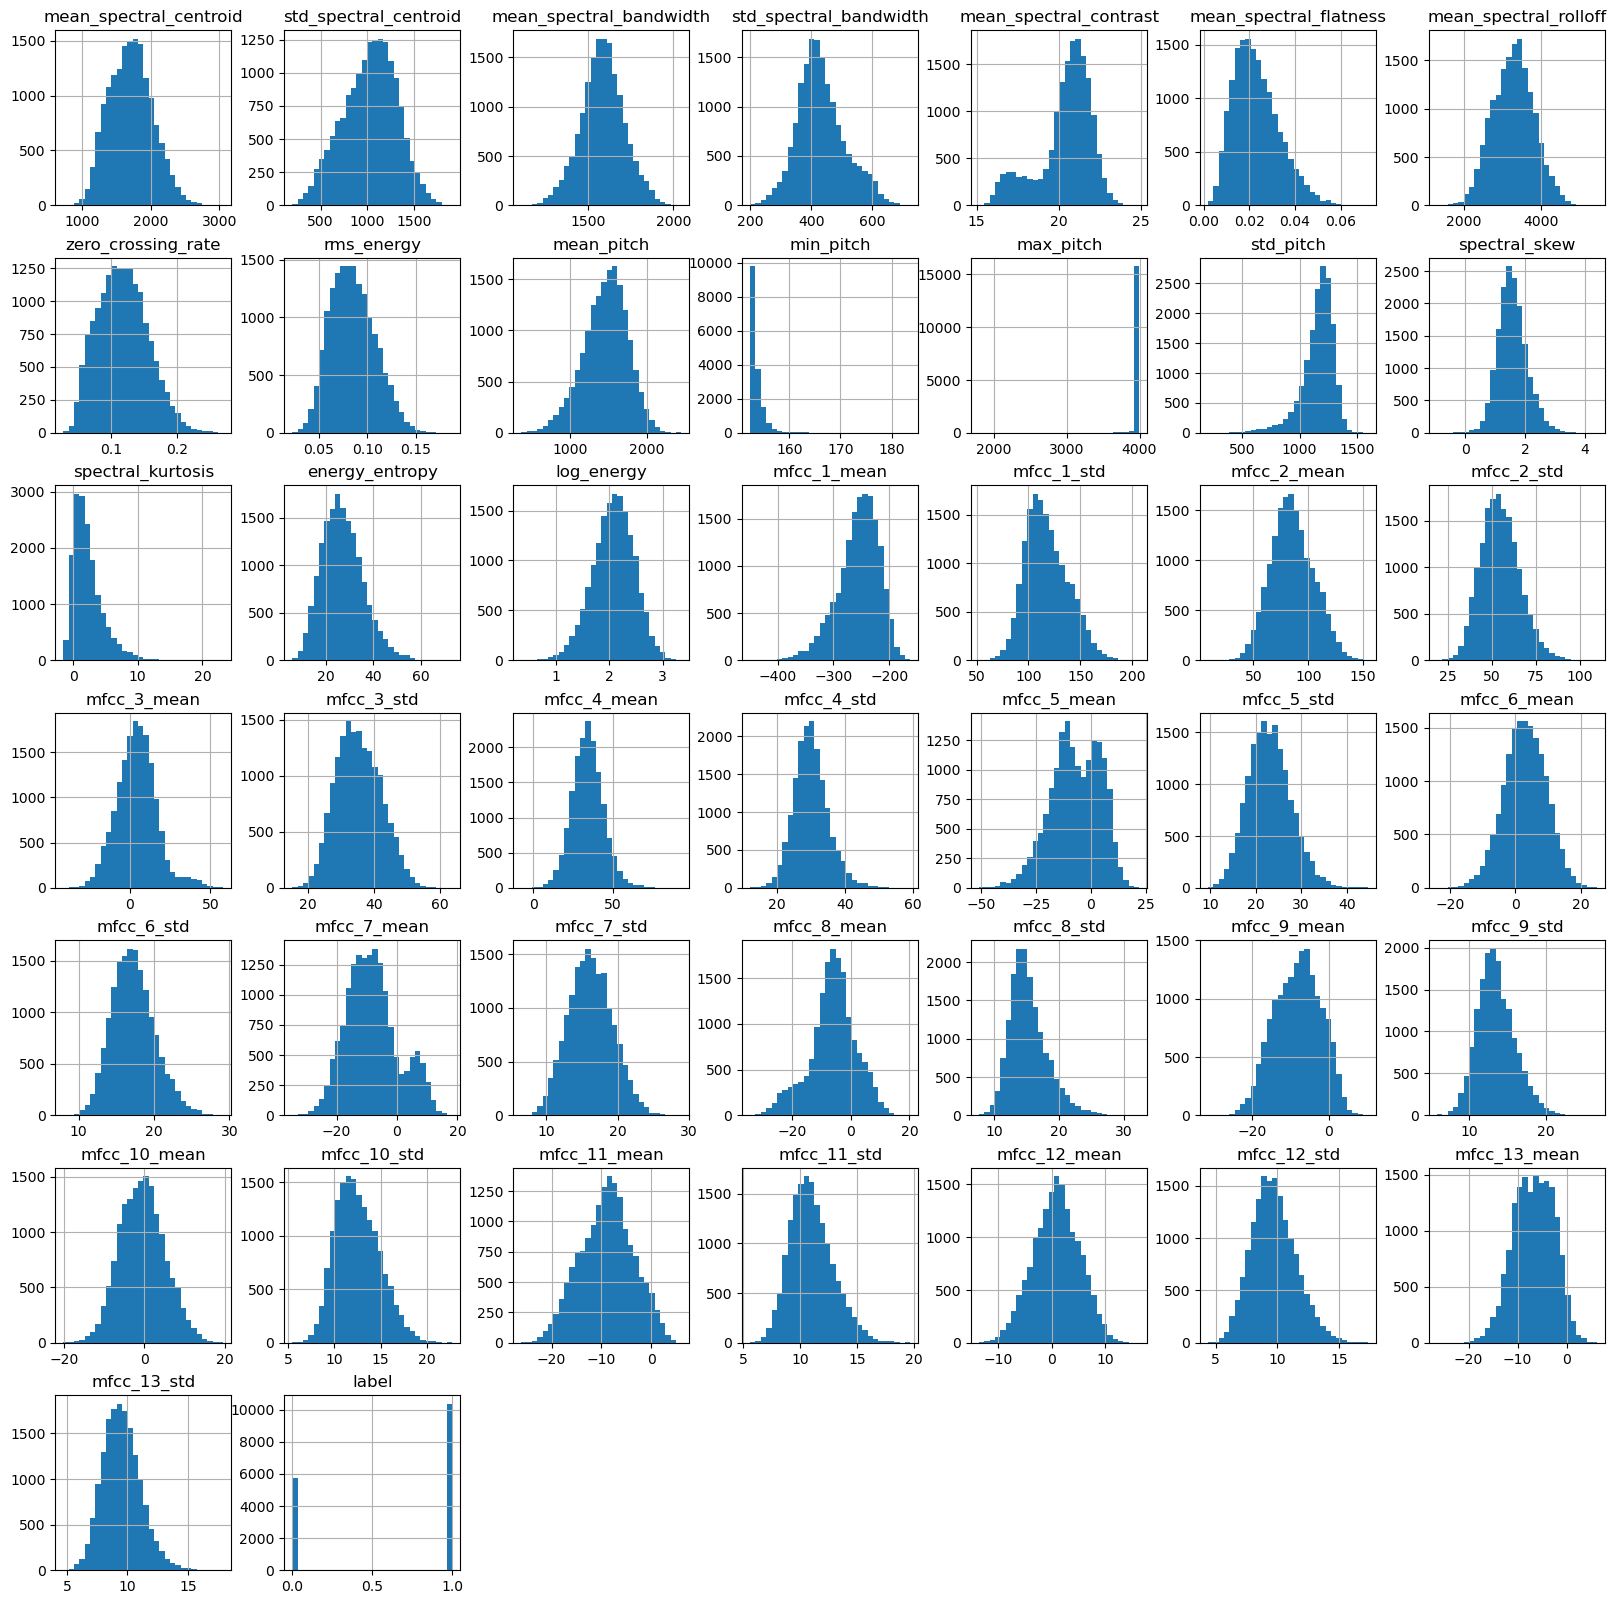

In [62]:
df.hist(figsize=(20, 20), bins=30)
plt.show()

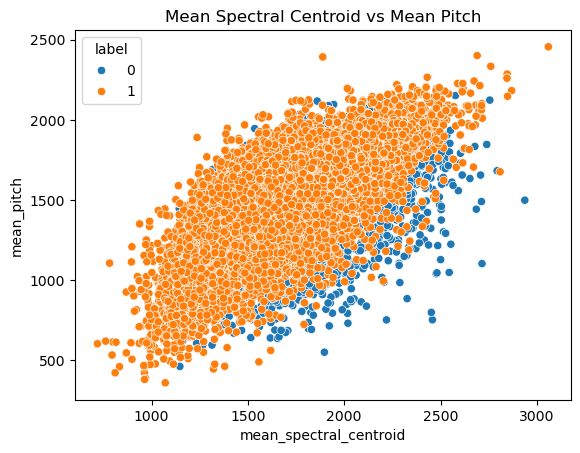

In [63]:
sns.scatterplot(x='mean_spectral_centroid', y='mean_pitch', hue='label', data=df)
plt.title('Mean Spectral Centroid vs Mean Pitch')
plt.show()

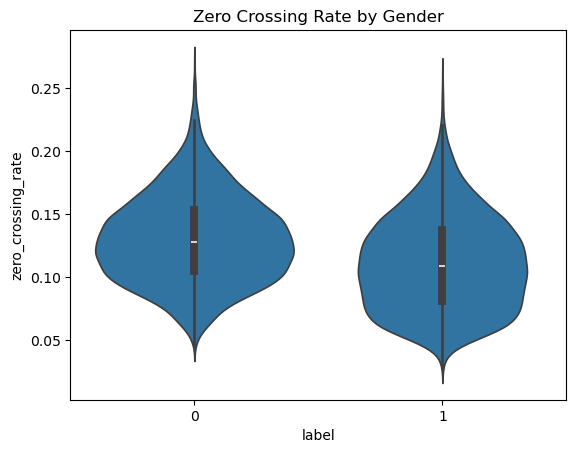

In [64]:
sns.violinplot(x='label', y='zero_crossing_rate', data=df)
plt.title('Zero Crossing Rate by Gender')
plt.show()

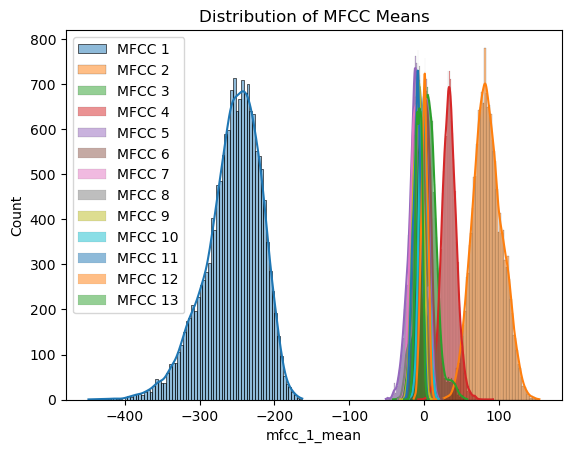

In [65]:
for i in range(1, 14):
    sns.histplot(df[f'mfcc_{i}_mean'], kde=True, label=f'MFCC {i}')
plt.legend()
plt.title('Distribution of MFCC Means')
plt.show()

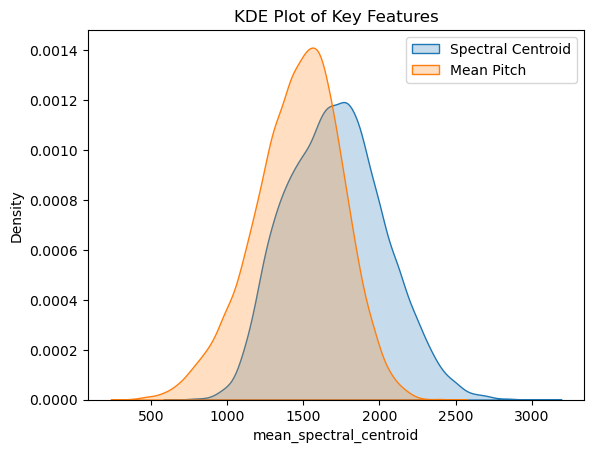

In [66]:
sns.kdeplot(df['mean_spectral_centroid'], shade=True, label='Spectral Centroid')
sns.kdeplot(df['mean_pitch'], shade=True, label='Mean Pitch')
plt.title('KDE Plot of Key Features')
plt.legend()
plt.show()

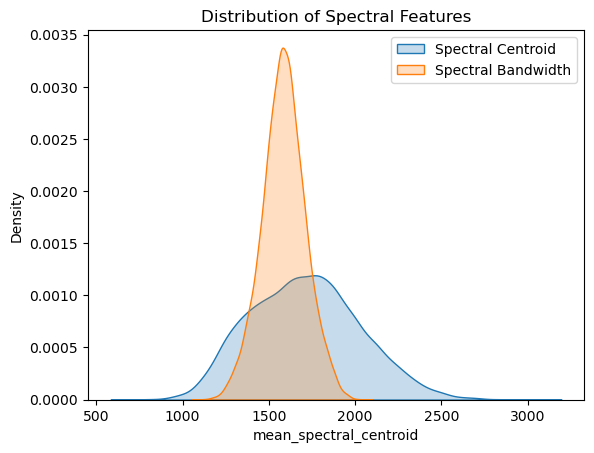

In [67]:
sns.kdeplot(df['mean_spectral_centroid'], shade=True, label='Spectral Centroid')
sns.kdeplot(df['mean_spectral_bandwidth'], shade=True, label='Spectral Bandwidth')
plt.title('Distribution of Spectral Features')
plt.legend()
plt.show()

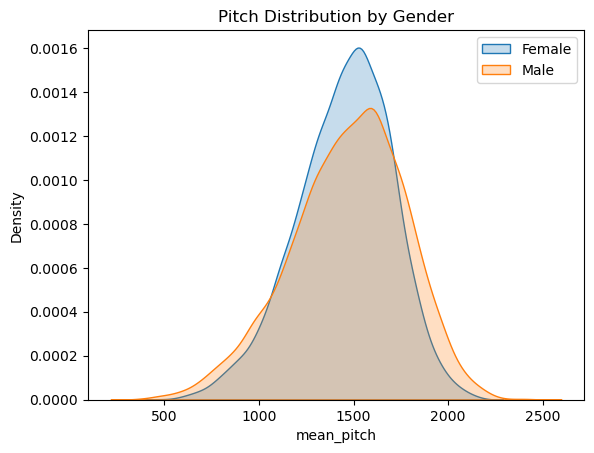

In [68]:
sns.kdeplot(df[df['label'] == 0]['mean_pitch'], shade=True, label='Female')
sns.kdeplot(df[df['label'] == 1]['mean_pitch'], shade=True, label='Male')
plt.title('Pitch Distribution by Gender')
plt.legend()
plt.show()

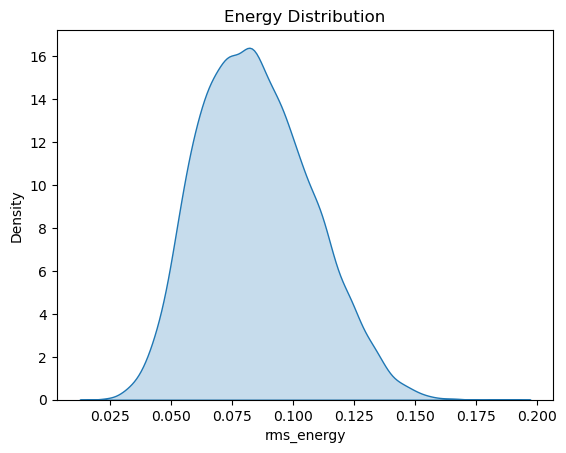

In [69]:
sns.kdeplot(df['rms_energy'], shade=True, label='RMS Energy')
plt.title('Energy Distribution')
plt.show()

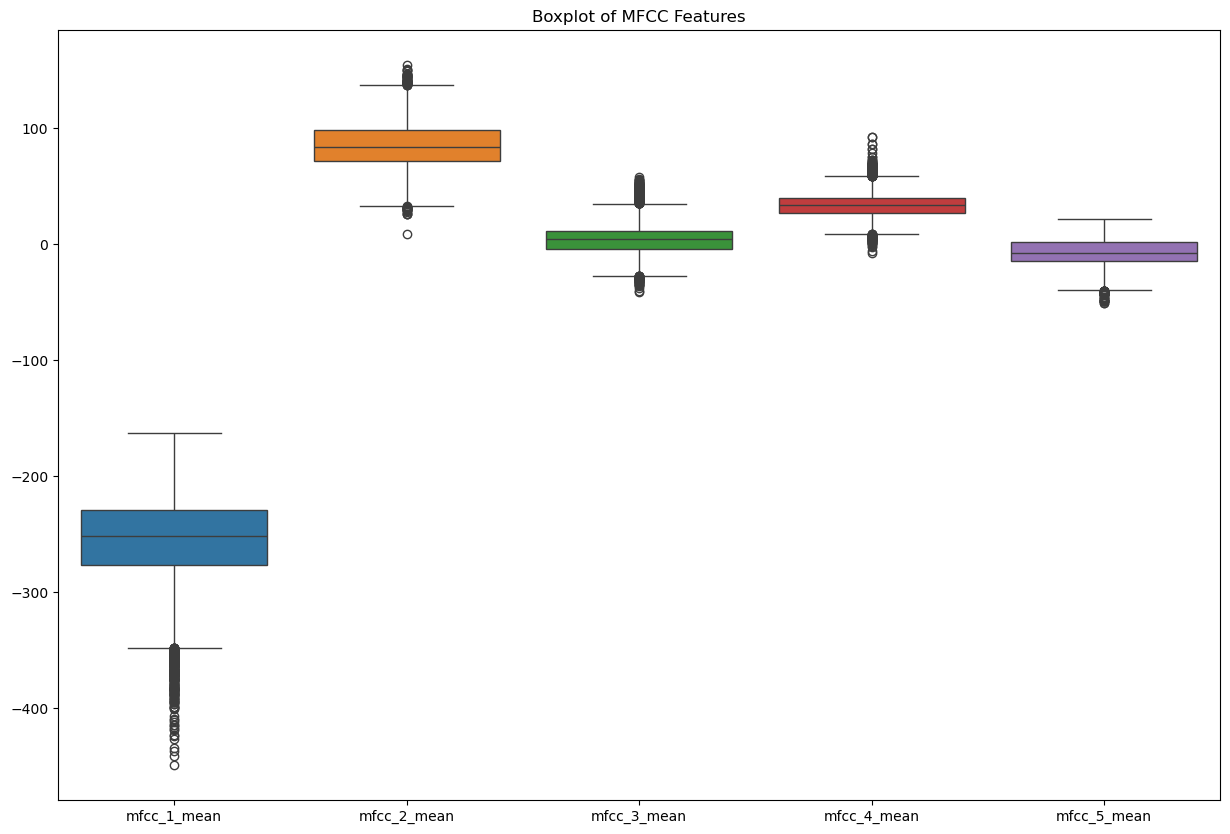

In [70]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[['mfcc_1_mean', 'mfcc_2_mean', 'mfcc_3_mean', 'mfcc_4_mean', 'mfcc_5_mean']])
plt.title('Boxplot of MFCC Features')
plt.show()

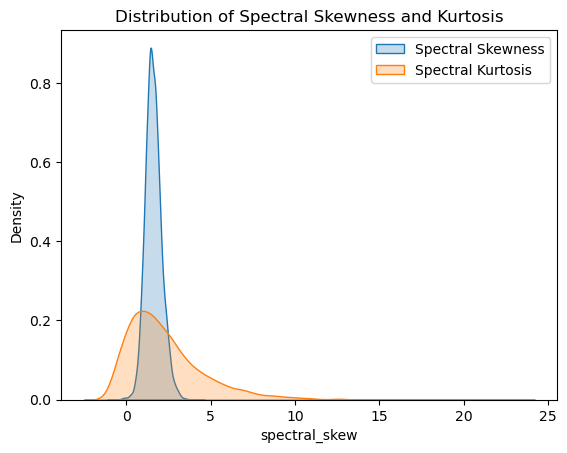

In [71]:
sns.kdeplot(df['spectral_skew'], shade=True, label='Spectral Skewness')
sns.kdeplot(df['spectral_kurtosis'], shade=True, label='Spectral Kurtosis')
plt.title('Distribution of Spectral Skewness and Kurtosis')
plt.legend()
plt.show()

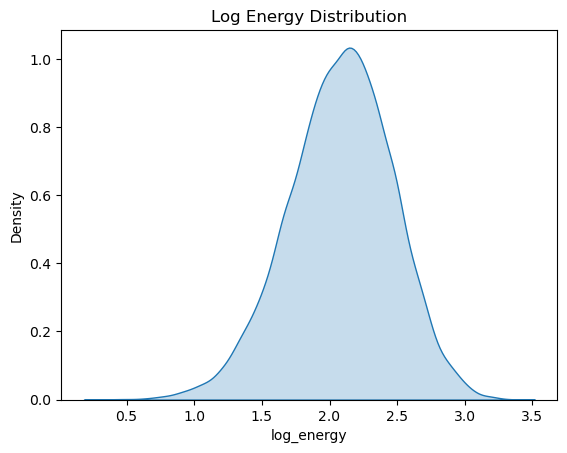

In [72]:
sns.kdeplot(df['log_energy'], shade=True, label='Log Energy')
plt.title('Log Energy Distribution')
plt.show()

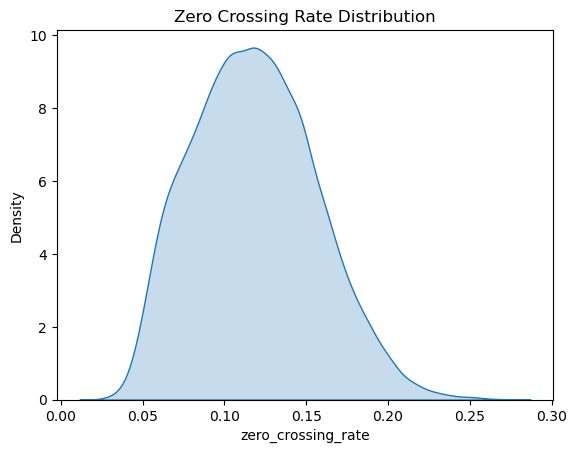

In [73]:
sns.kdeplot(df['zero_crossing_rate'], shade=True, label='Zero Crossing Rate')
plt.title('Zero Crossing Rate Distribution')
plt.show()

In [74]:
X = df.drop('label', axis=1)

In [75]:
y = df['label']

In [76]:
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [77]:
importances = model.feature_importances_
feature_names = X.columns

In [78]:
feature_importance_dict = dict(zip(feature_names, importances))

# Optional: sort and show top features
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

top_10_features = sorted_features[:15]

# Print them
print("🔝 Top 10 Important Features:")
for name, score in top_10_features:
    print(f"{name}: {score:.4f}")
# for name, score in sorted_features:
#     print(f"{name}: {score:.4f}")

🔝 Top 10 Important Features:
mfcc_5_mean: 0.1405
mean_spectral_contrast: 0.1171
mfcc_3_std: 0.0639
std_spectral_bandwidth: 0.0630
mfcc_2_mean: 0.0608
mfcc_1_mean: 0.0546
mfcc_12_mean: 0.0519
mfcc_10_mean: 0.0352
mfcc_8_mean: 0.0312
rms_energy: 0.0310
mfcc_10_std: 0.0303
mfcc_4_mean: 0.0254
mfcc_6_mean: 0.0244
mfcc_2_std: 0.0233
mfcc_13_mean: 0.0220


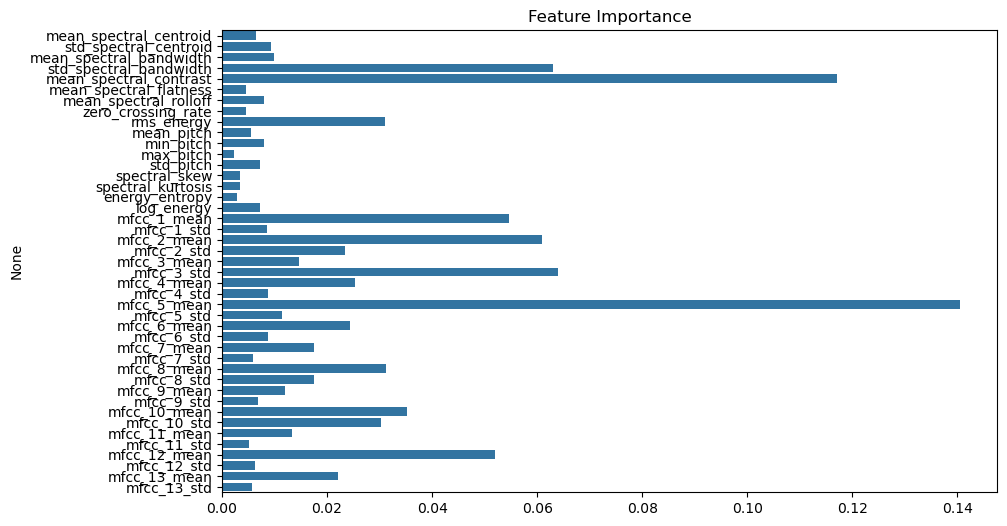

In [79]:
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance')
plt.show()

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [82]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

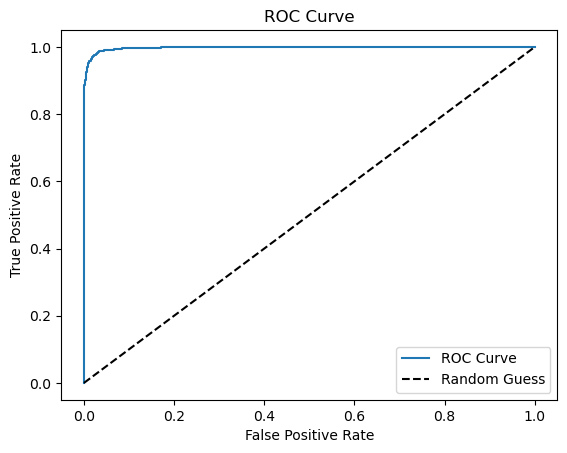

In [83]:
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

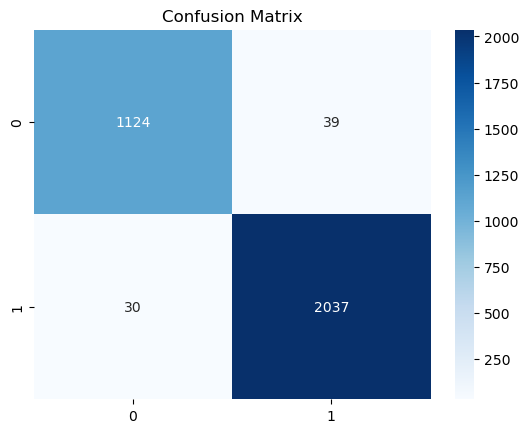

In [84]:
y_pred = model.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [85]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1163
           1       0.98      0.99      0.98      2067

    accuracy                           0.98      3230
   macro avg       0.98      0.98      0.98      3230
weighted avg       0.98      0.98      0.98      3230



In [86]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1163
           1       0.88      0.91      0.90      2067

    accuracy                           0.87      3230
   macro avg       0.86      0.85      0.85      3230
weighted avg       0.87      0.87      0.87      3230



In [87]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1163
           1       0.97      0.97      0.97      2067

    accuracy                           0.96      3230
   macro avg       0.96      0.96      0.96      3230
weighted avg       0.96      0.96      0.96      3230



In [88]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1163
           1       0.99      1.00      1.00      2067

    accuracy                           0.99      3230
   macro avg       0.99      0.99      0.99      3230
weighted avg       0.99      0.99      0.99      3230



In [89]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1163
           1       0.99      1.00      0.99      2067

    accuracy                           0.99      3230
   macro avg       0.99      0.99      0.99      3230
weighted avg       0.99      0.99      0.99      3230



In [90]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.64      0.72      1163
           1       0.82      0.92      0.87      2067

    accuracy                           0.82      3230
   macro avg       0.82      0.78      0.79      3230
weighted avg       0.82      0.82      0.81      3230



In [91]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      1163
           1       0.96      0.94      0.95      2067

    accuracy                           0.94      3230
   macro avg       0.93      0.93      0.93      3230
weighted avg       0.94      0.94      0.94      3230



In [92]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1163
           1       1.00      1.00      1.00      2067

    accuracy                           1.00      3230
   macro avg       1.00      1.00      1.00      3230
weighted avg       1.00      1.00      1.00      3230



In [93]:
top_15_features = [
    "mfcc_13_std", "mfcc_13_mean", "mfcc_12_std", "mfcc_12_mean",
    "mfcc_11_std", "mfcc_11_mean", "mfcc_10_std", "mfcc_10_mean",
    "mfcc_9_std", "mfcc_9_mean", "mfcc_8_std", "mfcc_8_mean",
    "mfcc_7_std", "mfcc_7_mean", "mfcc_6_std"
]

xtrain = X_train[top_15_features]
xtest = X_test[top_15_features]


model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)
model.fit(xtrain, y_train)
y_pred = model.predict(xtest)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1163
           1       0.98      0.98      0.98      2067

    accuracy                           0.97      3230
   macro avg       0.97      0.97      0.97      3230
weighted avg       0.97      0.97      0.97      3230



In [94]:
import joblib
joblib.dump(model, "voice_gender_model.pkl")

['voice_gender_model.pkl']